# Fits manipulation

We need some basic packages:

In [1]:
path = '/Users/jmilli/Documents/these/Python/coffee/fits_arrays'
from astropy.io import fits
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading a fits file

Let's start to read some fits files. We start with a standard image.

In [2]:
hdu_list1 = fits.open(os.path.join(path,'titan.fits'))

In [3]:
hdu_list1.info()

Filename: /Users/jmilli/Documents/these/Python/coffee/fits_arrays/titan.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU    1881   (300, 300, 1, 1)   float32   


Now how do we get the data?

In [4]:
titan_img = hdu_list1[0].data

In [5]:
print(type(titan_img))
print(titan_img.shape)

<type 'numpy.ndarray'>
(1, 1, 300, 300)


At this point, we can just close the FITS file. We have stored everything we wanted to a variable.

In [6]:
hdu_list1.close()

In [7]:
titan_img = titan_img.reshape(300,300)

In [10]:
np.reshape?

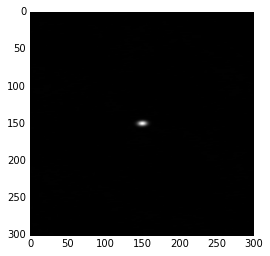

In [8]:
plt.imshow(titan_img,cmap='gray')
plt.show()

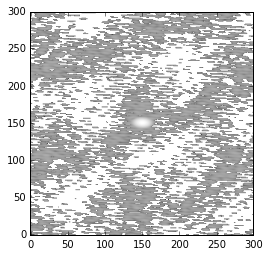

In [12]:
from matplotlib.colors import LogNorm
plt.imshow(titan_img, cmap='gray', norm=LogNorm(),origin='Lower')
plt.show()

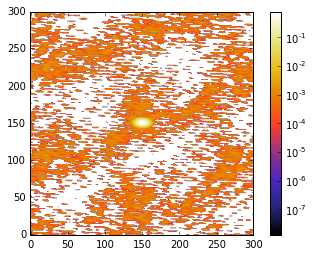

In [13]:
plt.imshow(titan_img, cmap='CMRmap', norm=LogNorm(),origin='Lower')
plt.colorbar()
plt.show()

## Want to be a bit faster ?

If we just want to retrieve the data, here is what we would do:

In [14]:
img_titan = fits.getdata(os.path.join(path,'titan.fits'))
img_titan.shape

(1, 1, 300, 300)

In [15]:
img_titan = img_titan.reshape((300,300))
img_titan.shape

(300, 300)

## Getting some statistics on the image

In [16]:
print('Min:', np.min(img_titan))
print('Max:', np.max(img_titan))
print('Mean:', np.mean(img_titan))
print('Stdev:', np.std(img_titan))

('Min:', -0.0024316318)
('Max:', 0.79593521)
('Mean:', 0.00055743748)
('Stdev:', 0.014648176)


To make a histogram with plt.hist(), we need to cast the data from a 2-D to array to something one dimensional.
In this case, I am using the iterable python object img_data.flat.

<type 'numpy.ndarray'>
(90000,)


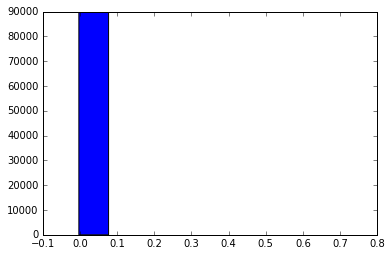

In [17]:
print(type(img_titan.ravel()))
print(img_titan.ravel().shape)
histogram = plt.hist(img_titan.ravel())

## Retrieving info from the header

In [18]:
hdu_list1 = fits.open(os.path.join(path,'titan.fits'))
hdu_list1[0].header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                  300                                                  
NAXIS2  =                  300                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   4.010728001595E-04                                                  
BMIN    =   1.922217177020E-04                                                  
BPA     =   8.841997528076E+

The header behaves like a dictionnary. It makes it very handy to read data from the header.


In [19]:
type(hdu_list1[0].header)

astropy.io.fits.header.Header

In [20]:
hdu_list1[0].header['BMAJ']

0.0004010728001595

In [21]:
keywords = ['BMAJ','BMAJ','BPA']
for keyword in keywords:
    print(hdu_list1[0].header[keyword])

0.00040107280016
0.00040107280016
88.4199752808


# Writing an image

## The long way

In [22]:
hdu = fits.PrimaryHDU(titan_img)
hdu.writeto(os.path.join(path,'titan_v2.fits'), clobber=True)

## The quick way

In [ ]:
fits.writeto(os.path.join(path,'titan_v3.fits'), titan_img,clobber=True)

## The advantage of the long way

In [23]:
dark =np.random.random(img_titan.shape)
flat =np.ones_like(titan_img)+np.random.random(img_titan.shape)
dark.shape
flat.shape

(300, 300)

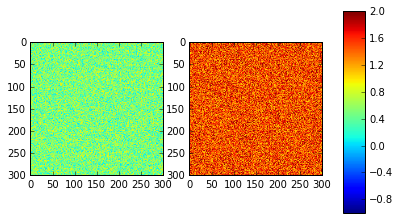

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2)
im1 = axes[0].imshow(dark, vmin=-1, vmax=2)
im2 = axes[1].imshow(flat, vmin=-1, vmax=2)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1, cax=cbar_ax)
plt.show()

In [25]:
hdu_list1 = fits.open(os.path.join(path,'titan.fits'))
new_primary_hdu_header = hdu_list1[0].header
new_primary_hdu_header.set('TOTO',19.5)

new_primary_hdu = fits.PrimaryHDU(img_titan,header=new_primary_hdu_header)

flat_hdu =  fits.ImageHDU(flat,name='FLAT') 
dark_hdu =  fits.ImageHDU(dark,name='DARK') 

hdulist = fits.HDUList([new_primary_hdu,flat_hdu,dark_hdu])

hdulist.writeto(os.path.join(path,'new_titan.fits'),output_verify='ignore',clobber=True)
hdu_list1.close()

In [26]:
hdu_list2 = fits.open(os.path.join(path,'new_titan.fits'))
hdu_list2.info()
hdu_list2.close()

Filename: /Users/jmilli/Documents/these/Python/coffee/fits_arrays/new_titan.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU    1878   (300, 300)   float32   
1    FLAT        ImageHDU         8   (300, 300)   float64   
2    DARK        ImageHDU         8   (300, 300)   float64   


In [27]:
hdu_list3 = fits.open(os.path.join(path,'SPHERE_GEN_SPARTA252_0009.fits'))

In [28]:
hdu_list3.info()

Filename: /Users/jmilli/Documents/these/Python/coffee/fits_arrays/SPHERE_GEN_SPARTA252_0009.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     510   ()              
1    AtmPerfParams  BinTableHDU     25   137R x 7C    [1J, 1J, 1E, 1E, 1E, 1E, 1E]   
2    VisLoopParams  BinTableHDU     47   183R x 18C   [1J, 1J, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
3    IRLoopParams  BinTableHDU     27   92R x 8C     [1J, 1J, 1E, 1E, 1E, 1E, 1E, 1E]   
4    PupLoopParams  BinTableHDU     23   91R x 6C     [1J, 1J, 1E, 1E, 1E, 1E]   
5    Vibrations  BinTableHDU     67   45R x 28C    [1J, 1J, 10E, 10E, 10E, 10E, 10E, 10E, 10E, 10E, 10E, 10E, 10E, 10E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
6    IRPixelAvgFrame  BinTableHDU     21   92R x 5C     [1J, 1J, 1J, 1J, 1024E]   


In [29]:
table = hdu_list3[1].data
type(table)
#print(table)

astropy.io.fits.fitsrec.FITS_rec

In [30]:
table.columns

ColDefs(
    name = 'Sec'; format = '1J'
    name = 'USec'; format = '1J'
    name = 'R0'; format = '1E'
    name = 'T0'; format = '1E'
    name = 'L0'; format = '1E'
    name = 'WindSpeed'; format = '1E'
    name = 'StrehlRatio'; format = '1E'
)

In [31]:
table['StrehlRatio']

array([ 0.71700418,  0.6991387 ,  0.70049858,  0.69629836,  0.6920597 ,
        0.68288934,  0.69054312,  0.68399471,  0.66555548,  0.67721617,
        0.67335218,  0.68659216,  0.67540562,  0.67574483,  0.67009097,
        0.68865043,  0.69901574,  0.66483861,  0.67280692,  0.67867893,
        0.65534192,  0.66875559,  0.67827529,  0.66409826,  0.67956614,
        0.68384856,  0.6629405 ,  0.69003284,  0.67687047,  0.65895802,
        0.6655159 ,  0.69320035,  0.68539137,  0.68394965,  0.69583184,
        0.69529581,  0.69743347,  0.66795641,  0.68318123,  0.69421011,
        0.68774772,  0.69638675,  0.70206046,  0.66250485,  0.67767996,
        0.69403559,  0.67027932,  0.69226539,  0.7042526 ,  0.69014752,
        0.69945729,  0.70199722,  0.71207094,  0.70304573,  0.71602356,
        0.68597335,  0.66555911,  0.69080013,  0.68606079,  0.68471259,
        0.68690169,  0.64945287,  0.56868798,  0.57558149,  0.54519951,
        0.52649194,  0.53083533,  0.51803231,  0.46332267,  0.50

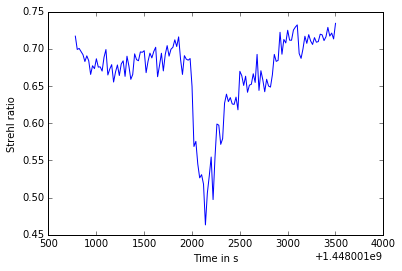

In [32]:
plt.plot(table['Sec'],table['StrehlRatio'])
plt.xlabel('Time in s')
plt.ylabel('Strehl ratio')